In [ ]:
pip install fpdf

In [ ]:
#TASK 1  Data Exploration and Preprocessing

Dataset Loaded Successfully!
Shape of dataset: (9551, 21)

Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


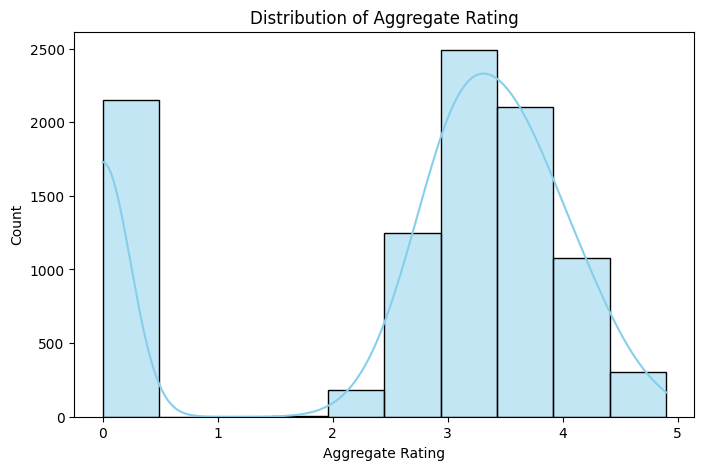


Class Distribution of Aggregate Rating:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset .csv')  # Use correct path if different


print("Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)


print("\nMissing Values in Each Column:")
print(df.isnull().sum())


df_cleaned = df.dropna(subset=['Aggregate rating'])


df_cleaned['Aggregate rating'] = df_cleaned['Aggregate rating'].astype(float)


plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Aggregate rating'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


print("\nClass Distribution of Aggregate Rating:")
print(df_cleaned['Aggregate rating'].value_counts())


In [ ]:
#TASK 2 Descriptive Analysis

Basic Statistical Measures:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250

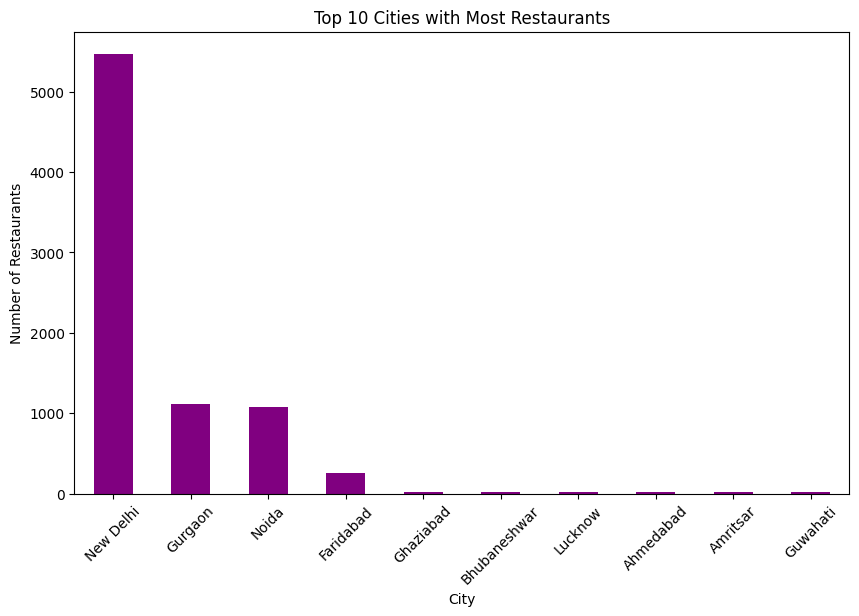

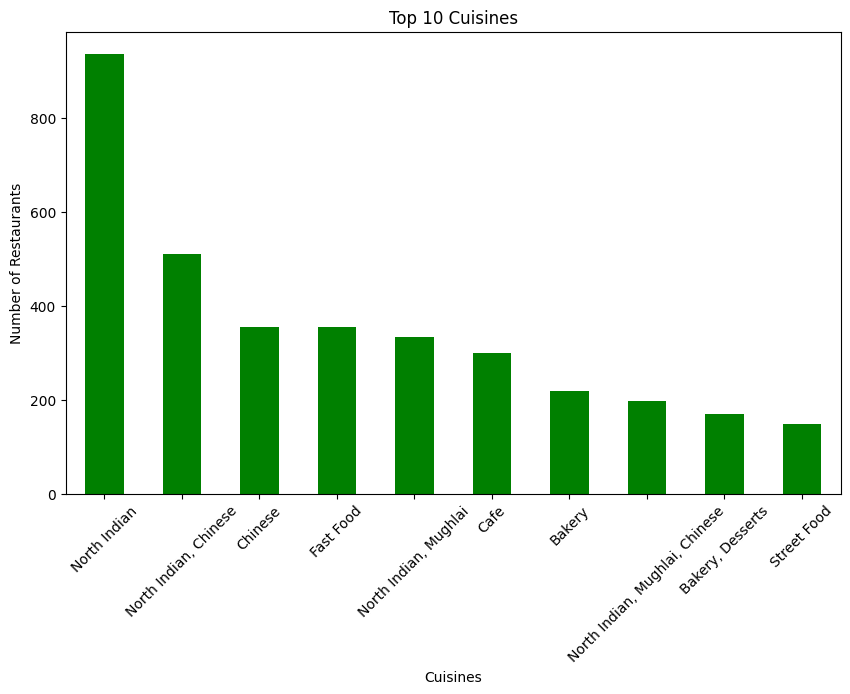

In [ ]:
import pandas as pd


df = pd.read_csv('Dataset .csv')


print("Basic Statistical Measures:")
print(df.describe())


print("\nCountry Code distribution:")
print(df['Country Code'].value_counts())

print("\nCity distribution:")
print(df['City'].value_counts())

print("\nTop 10 Cuisines:")
print(df['Cuisines'].value_counts().head(10))


import matplotlib.pyplot as plt

top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='purple')
plt.title('Top 10 Cities with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


top_cuisines = df['Cuisines'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_cuisines.plot(kind='bar', color='green')
plt.title('Top 10 Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#TASK 3 Geospatial Analysis

Geospatial map saved as restaurant_map.html


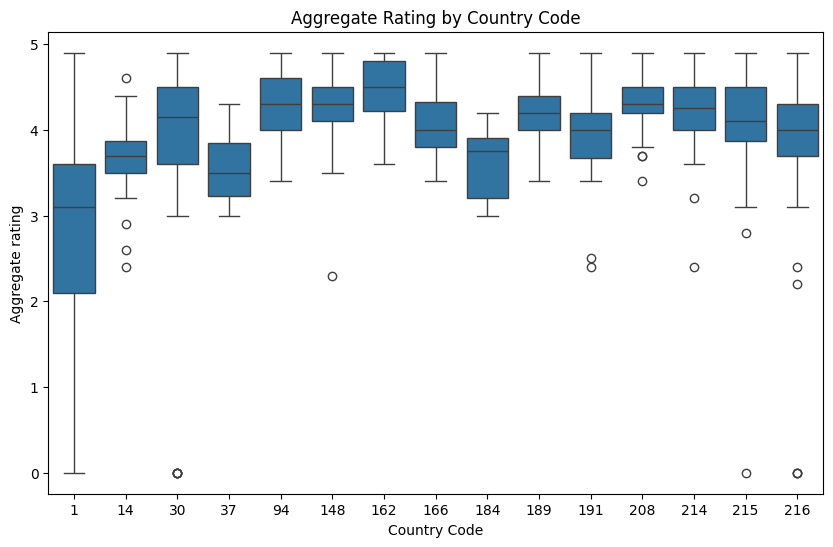

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset .csv')


df_geo = df.dropna(subset=['Latitude','Longitude'])


m = folium.Map(location=[df_geo['Latitude'].mean(), df_geo['Longitude'].mean()], zoom_start=2)


marker_cluster = MarkerCluster().add_to(m)
for index, row in df_geo.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)


m.save('restaurant_map.html')
print("Geospatial map saved as restaurant_map.html")


plt.figure(figsize=(10,6))
sns.boxplot(x='Country Code', y='Aggregate rating', data=df_geo)
plt.title('Aggregate Rating by Country Code')
plt.show()
